# Chapter 12 : K-평균 군집화 모델
## 1. K-평균 군집화 모델이란?
- $K$-평균 군집화(K-means clustering) 모델 : 주어진 $K$에 대하여 각 샘플과 그 샘플이 속한 군집의 중심까지 거리의 제곱합을 최소화하는 $K$개의 군집을 찾아내는 기법
- 큰 데이터셋에서도 효율적
- 다양한 분야에서 널리 사용함

## 2. K-평균 군집화 모델 구현하기
### K-평균 군집화 모델의 이론
- $n$개의 샘플로 구성된 피처 행렬 $X$를 중심이 $\mu_j (1 \leq j \leq K)$인 $K$개의 군집으로 분할
- 중심 : 군집 내 각 원소의 평균값
- 중심값이 $X$의 샘플 중에 포함되지 않을 수도 있음
- 클러스터 내의 제곱합을 최소화하는 중심을 찾는 것을 목표로 함
- 군집의 중심 집합 : $C = {\mu_j | 1 \leq j \leq K}$라 할 때 비용 함수  
$\rightarrow$ $J(\mu_1, \dots, \mu_j) = \displaystyle \sum_{i = 1}^{n} min_{\mu_j \in C} (\parallel x_i - \mu_j \parallel ^2)$  
- 비용 함수 : 얼마나 군집 내 원소가 뭉쳐서 형성되어 있는지를 평가  
<br><br>
- K-평균 군집화 기법 문제를 푸는 알고리즘 : 로이드(Lloyd) 알고리즘, 엘칸(Elkan) 알고리즘
- 로이드 알고리즘 단계
1. K개의 중심을 임의로 고른다.
2. 각 샘플에서 가장 가까운 중심을 해당 샘플을 포함한 군집의 중심으로 정한다.
3. 군집별로 샘플 피처값의 평균을 계산하여 이를 군집의 새로운 중심으로 업데이트한다.
4. 더는 중심이 변하지 않거나 변화가 임계값 이하일 때까지 2~3 과정을 반복한다.
- 이터레이션 사이의 비용 함수 감소량이 임계값 이하로 떨어지면 종료됨
- 언제나 수렴하지만, 수렴값은 전역 최솟값을 보장하지 못함
- 수렴값은 초기 중심값의 위치에 따라 크게 달라질 수 있음
- 실제 계산에서는 다른 초깃값을 준 상태에서 알고리즘을 여러 번 반복하여 전역 최적값을 추정함
    - k-means++ 초기화 방법 : 초기 중심값을 멀리 떨어지게 하여 랜덤 초기화보다 좋은 결과를 만들어낼 수 있음

#### 시간 복잡도
- 가장 빠른 군집화 알고리즘
- 로이드 알고리즘을 이용한 K-평균 군집화 기법의 평균 시간 복잡도 : $O(Kni)$
    - $K$ : 군집 개수
    - $n$ : 샘플 개수
    - $i$ : 이터레이션 횟수

### K-평균 군집화 모델 구현하기
- 로이드 알고리즘 기반의 K-평균 군집화 모델 구현
- 두 개의 지점을 중심으로 원형으로 흩어진 데이터셋을 가상으로 생성하여 사용

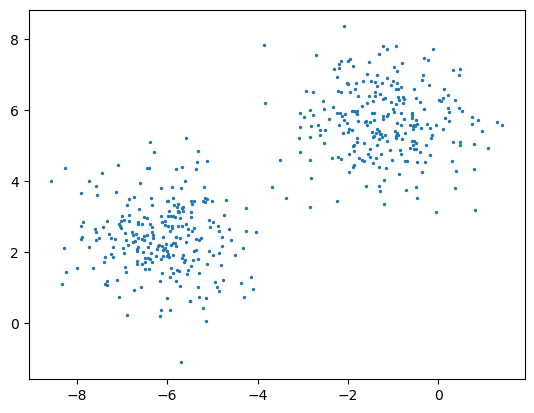

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

X = make_blobs(n_samples = 500, centers = 2, random_state = 1234)[0]
plt.scatter(X[:, 0], X[:, 1], s = 2)

- 초기 중심점을 랜덤하게 설정하고 학습을 수행
- 최대 이터레이션 횟수를 10회로 하고 각 샘플의 군집 대응과 중심점 업데이트를 반복
- 업데이트가 일어나지 않으면 종료
- 시각화를 위해 이터레이션별로 군집의 위치와 각 샘플의 포함 군집을 나타냄
- 관찰이 쉽도록 그래프는 최대 6개까지만 그림

이터레이션 : 1, 중심 : [[-6.1135271   1.58096684]
 [-2.90878169  4.78340178]]

이터레이션 : 2, 중심 : [[-6.1550979   2.32910441]
 [-1.3419916   5.62012837]]

이터레이션 : 3, 중심 : [[-6.11472428  2.40975303]
 [-1.18984097  5.67112071]]

이터레이션 : 4, 중심 : [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션 : 5, 중심 : [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션 5에서 학습 종료



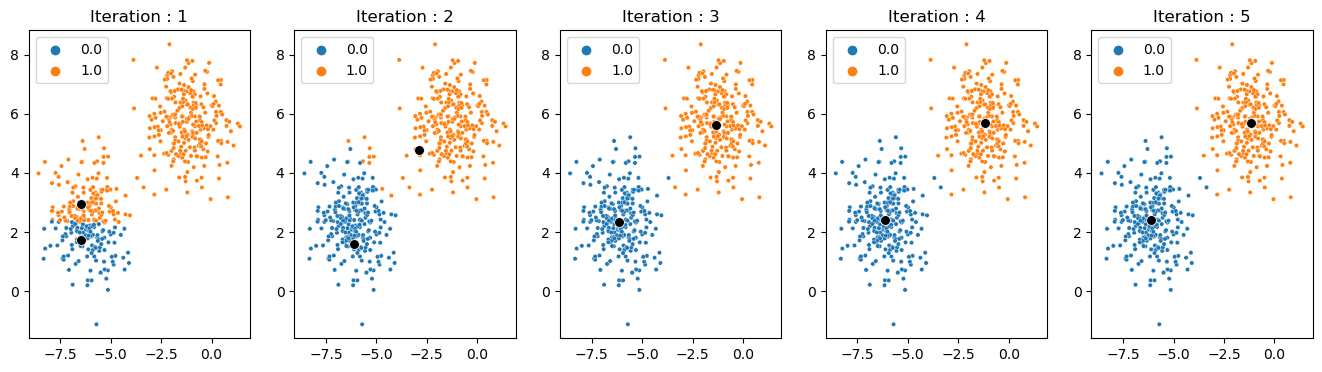

In [12]:
np.random.seed(1234)
cluster = np.zeros(X.shape[0])
centroid_old = X[np.random.randint(X.shape[0], size = 2), :]

f = plt.figure(figsize = (20, 4))
for it in range(1, 11):
    for i, row in enumerate(X):
        d = float('inf')
        for ind, centroid in enumerate(centroid_old):
            tmp = np.linalg.norm(centroid - row)
            if (d > tmp):
                d = tmp
                cluster[i] = ind
                
    ax = f.add_subplot(1, 6, it)
    ax.set_title("Iteration : " + str(it))
    sns.scatterplot(X[:, 0], X[:, 1], s = 10, hue = cluster)
    sns.scatterplot(centroid_old[:, 0], centroid_old[:, 1], s = 50, color = 'k')
    
    centroid = pd.DataFrame(X).groupby(by = cluster).mean().values
    print(f'이터레이션 : {it}, 중심 : {centroid}\n')
    
    if (np.allclose(centroid, centroid_old)):
        print(f'이터레이션 {it}에서 학습 종료\n')
        break
        
    centroid_old = centroid

- 그래프 : 이터레이션에 따른 군집 변화 나타냄
- 파란색 군집이 왼쪽 아래에만 일부 생성되었다가, 이터레이션 진행에 따라 주황색 군집을 밀어내는 것을 확인할 수 있음
    - 오른쪽 위의 점들이 주황색 군집의 중심을 계속해서 당기기 때문
- 각 군집의 중심점이 점점 자리를 찾아가고, 이터레이션 4와 5에서 군집 중심에 변화가 없으므로 최대 이터레이션에 도달하지 않더라도 이터레이션 5에서 학습을 종료

## 3. 패키지로 표현하기
- sklearn.cluster.KMeans 클래스 : K-평균 군집화 기법을 구현
- n_clusters
    - 주요값 : int > 0
    - 기본값 : 8
    - 의미 : 생성할 클러스터의 수
- init
    - 주요값 : 'k-means++', 'random'
    - 기본값 : 'k-means++'
    - 의미 : 초기화 방법 선택
- n_init
    - 주요값 : int > 0
    - 기본값 : 10
    - 의미 : 설정된 알고리즘을 반복하는 횟수
        - 반복마다 서로 다른 중심 초깃값을 사용
        - 전체 수행 후 비용 함수가 가장 적은 결과를 최종 결과로 선택
- max_iter
    - 주요값 : int > 0
    - 기본값 : 300
    - 의미 : 각각의 알고리즘 반복에서 이터레이션의 상한값
- tol
    - 주요값 : float > 0
    - 기본값 : 1e-4
    - 의미 : 조기 종료를 위한 허용 오차 설정
        - 두 이터레이션 동안의 군집 중심 변화를 Frobenius norm으로 구한 후 이 값이 tol보다 작다면 종료
- random_state
    - 주요값 : int, None
    - 기본값 : None
    - 의미 : 중심 초기화에 대한 랜덤성 제어
- algorithm
    - 주요값 : 'lloyd', 'elkan'
    - 기본값 : 'lloyd'
    - 의미 : 학습에 사용할 알고리즘 선택
        - 'lloyd' : 로이드 알고리즘(기본적인 EM-알고리즘)
        - 'elkan' : 삼각 부등식()을 이용하는 엘칸 알고리즘을 적용
            - 효율적으로 학습할 수 있으나 메모리를 많이 사용할 수 있음

**실제 사용 시 활용 팁**
- K-평균 군집화 기법은 거리를 기반으로 작동 $\rightarrow$ 모델링 전에 각 피처를 스케일링하는 것이 좋음
- tol or max_iter 등 때문에 완전히 수렴하기 전에 알고리즘이 멈춘다면 중심이 각각의 클러스터의 평균과 다를 수도 있으므로 조심
- KMeans 클래스에서도 fit() 메서드와 predict() 메서드를 이용하여 학습과 예측 과정을 분리할 수 있음
    - 학습과 예측을 동시에 수행 $\rightarrow$ fit_predict() 메서드 사용

### KMeans 클래스 사용하기
- KMeans 클래스를 사용하여 주어진 데이터를 학습하고 학습한 레이블을 확인
- 데이터셋 : 샘플이 6개인 2차원 피처를 가성으로 생성

In [13]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

- 군집의 수가 2인 K-평균 군집화 모델을 학습하고 레이블 출력
- 반복의 랜덤성을 제어하고자 random_state를 지정

In [14]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
print(f'샘플별 군집 번호 : {kmeans.labels_}')

샘플별 군집 번호 : [1 1 1 0 0 0]


- 첫 3개의 샘플이 레이블 1에 대응하고 그 다음 3개 샘플이 레이블 0에 대응함
- 첫 3개 샘플과 다음 3개의 샘플은 각각 첫 번때 피처의 값이 1과 10으로 크게 차이가 나기 때문에 해당 군집화 결과는 가까운 샘플을 같은 군집으로 배정한 측면에서 유효한 결과라고 할 수 있음

## 4. K-평균 군집화 모델 보충 수업
### K-평균 군집화 모델 적용이 부적절한 데이터셋
- K-평균 군집화 모델은 이론적으로 각 중심점 근처의 샘플은 모두 동일 군집으로 간주
- 각 군집은 그 경계가 다른 군집을 둘러싸지 않는 컨벡스 집합(convex set) 형태로 형성됨
    - 집합 A가 있을 때 임의의 $t \in [0, 1]$에 대하여 $x, y \in A$이면 $tx + (1 - t)y \in A$를 항상 만족할 경우 A를 컨벡스 집합이라고 함
    - 컨벡스 집합에서는 경계선 내부를 모두 원소로 가지므로 내부가 빈 데이터셋은 컨벡스 집합이 아님
- 이터레이션을 반복하며 각 군집별 경계선의 내부를 같은 군집으로 채우게 됨
- 일직선으로 분할하는 형태의 군집을 얻음
- 분리된 컨벡스 집합의 조합으로 형선된 데이터셋 등에 한하여 K-평균 군집화 기법을 사용하는 것이 가장 적절

### 군집화 결과 평가하기
- 군집화 기법의 성능을 정의하면 얼마나 잘 학습한 모델인지도 평가할 수 있고, 군집 개수와 같은 중요 하이퍼파라미터를 튜닝할 수도 있음
- 지도 학습 기법과 달리 명쾌한 정답이 없을 때가 흔함
1. 데이터 분할에 대한 실제 레이블이 있다면 레이블과 군집화 결과가 비슷할수록 좋은 모델링
    - 실제 레이블 번호와 군집의 레이블 번호의 값을 직접 비교하지 않음
        - 군집에 어떠한 번호가 부여되었는지는 사실 중요하지 않고 전체 데이터가 분할된 분포 or 패턴만이 중요하기 때문
    - 군집 번호의 퍼뮤테이션(permutation)에 따라 군집화 모델의 성능은 변하지 않음
2. 데이터 분할에 대한 실제 레이블이 없다면 같은 군집 내의 원소끼리는 가까울수록, 다른 군집 내의 원소와는 멀수록 좋은 군집화

#### Rand 지수
- Rand 지수(Rand index, RI) : 군집 번호에 대한 실제 레이블이 있을 때 실제 기준 군집 $P$와 모델링에 따른 군집화 결과 $C$를 비교
- $n$ : 전체 샘플 개수
- a : $P$에서도 같은 군집에 속하고 $C$에서도 같은 군집에 속한 쌍의 수
- b : $P$에서도 다른 군집에 속하고 $C$에서도 다른 군집에 속한 쌍의 수
- RI : a와 b의 합을 $C$에서 두 원소를 선택하는 경우의 수인 $\begin{pmatrix} n \\ 2 \end{pmatrix} = \frac{n(n - 1)}{2}$로 나눈 것  
$RI = \frac{2(a + b)}{n(n - 1)}$  

- 퍼뮤테이션을 무시했을 때 같은 데이터에 대한 두 군집화 결과의 유사성을 측정하는 방법
- 군집에 부여한 번호에 따른 계산 차이는 생기지 않음
- 전체 쌍 중에서 조건을 만족하는 쌍의 비율을 직접 구하는 방식 $\rightarrow$ 결과를 해석하기 쉬움
- 군집 구조에 대한 어떠한 가정도 필요하지 않음
- 실제 레이블 값이 알려졌을 때 모든 군집화 기법을 평가하는 데에 적용할 수 있음(장점)
    - 0에서 1 사이의 값이며 클수록 결과가 비슷
    - 완벽한 동일 결과하면 값은 1
- 완전한 임의의 두 군집화 결과에 대해서도 0이 아닌 비교적 큰 값을 부여하고 크게 다른 두 군집화 결과에 대해서도 1에 가까운 큰 값을 부여 $\rightarrow$ 유사도를 과대평가(문제점)
    - 두 랜덤한 군집화 결과에 대해서는 0에 가까운 값을 부여하는 수정 Rand 지수(adjusted Rand index, ARI)도 많이 활용  
    $ARI = \frac{RI - E[RI]}{max(RI) - E[RI]}$
    - ARI : -1에서 1 사이의 값
    - 클러스터 개수와 샘플 개수에 관계없이 랜덤한 두 군집화 결과에 대하여는 0에 가까운 값을 부여
- RI와 ARI 모두 실제 레이블에 대한 지식을 요구
    - 실제 사례에서는 실제값을 데이터화한 경우가 많지 않음(문제점)

### RI와 ARI 계산하기
- 여섯 개의 샘플로 구성된 데이터의 군집 결과가 [0, 1, 2], [3, 4, 5]라고 가정
- 데이터의 실제 분할이 [0, 1], [2, 3], [4, 5]라고 할 때 군집 결과의 RI와 ARI를 구하고 여러 측면에서 비교
- RI는 sklearn.metrics.rand_score() 함수로 계산 가능

In [15]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(f'RI : {metrics.rand_score(labels_true, labels_pred) : .4f}')

RI :  0.6667


- 직접 계산
1. 모델링 결과와 실제 결과에서 모두 같은 군집에 포함된 샘플의 쌍 : (0, 1), (4, 5) $\rightarrow$ a = 2
2. 모델링 결과와 실제 결과에서 모두 다른 군집에 포함된 샘플의 쌍 : (0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 4), (2, 5) $\rightarrow$ b = 8
- 전체 쌍의 수 : $\begin{pmatrix} 6 \\ 2 \end{pmatrix} = 15$
- RI = $\frac{2 + 8}{15} = 0.667$  
<br><br>
- ARI는 sklearn.metrics.adjusted_rand_score() 함수로 계산

In [16]:
print(f'ARI : {metrics.adjusted_rand_score(labels_true, labels_pred) : .4f}')

ARI :  0.2424


- RI와 ARI는 군집 레이블의 퍼뮤테이션에 대하여 변하지 않음
- 군집 번호가 달라져도 결과는 동일

In [18]:
labels_pred = [1, 1, 0, 0, 3, 3]

print(f'퍼뮤테이션 후 RI : {metrics.rand_score(labels_true, labels_pred) : .4f}')
print(f'퍼뮤테이션 후 ARI : {metrics.adjusted_rand_score(labels_true, labels_pred) : .4f}')

퍼뮤테이션 후 RI :  0.6667
퍼뮤테이션 후 ARI :  0.2424


- RI와 ARI는 두 입력값의 순서가 달라도 결과는 바뀌지 않으므로 실제값과 군집화 결과를 비교하는 대신 단순히 두 입력값에 대한 비교하 두 군집화 결과의 유사도(similarity)에도 적용 가능

In [19]:
print(f'대칭된 입력값에 대한 RI : {metrics.rand_score(labels_pred, labels_true) : .4f}')
print(f'대칭된 입력값에 대한 ARI : {metrics.adjusted_rand_score(labels_pred, labels_true) : .4f}')

대칭된 입력값에 대한 RI :  0.6667
대칭된 입력값에 대한 ARI :  0.2424


- 완전히 동일한 입력값에 대해서는 RI와 ARI 모두 항상 1을 얻음

In [21]:
labels_pred = labels_true.copy()

print(f'동일한 입력값의 RI : {metrics.rand_score(labels_true, labels_pred) : .4f}')
print(f'동일한 입력값의 ARI : {metrics.adjusted_rand_score(labels_true, labels_pred) : .4f}')

동일한 입력값의 RI :  1.0000
동일한 입력값의 ARI :  1.0000


- 거의 랜덤한 두 입력값이 주어졌을 때 ARI는 0에 가깝거나 심지어 음수의 값을 가지기도 함
- RI의 경우 0보다 꽤 큰 값을 가지는 경우가 자주 발생

In [22]:
labels_true = [0, 0, 0, 0, 0, 0, 1, 1]
labels_pred = [0, 1, 2, 3, 4, 5, 5, 6]

print(f'거의 랜덤한 입력값에 대한 RI : {metrics.rand_score(labels_true, labels_pred) : .4f}')
print(f'거의 랜덤한 입력값에 대한 ARI : {metrics.adjusted_rand_score(labels_true, labels_pred) : .4f}')

거의 랜덤한 입력값에 대한 RI :  0.3929
거의 랜덤한 입력값에 대한 ARI : -0.0721


#### 실루엣 계수
- 실제 레이블을 모를 때는 모델 내의 정보로 군집화 모델의 성능을 판정해야 하는 데, 이때 실루엣 계수(silhouette coefficient)를 이용한 판정법이 유용
- 실루엣 계수 : 샘플별로 계산할 수 있고, 평균하여 전체 군집화 결과의 실루엣 계수값 또한 얻을 수 있음
- $n$ : 피처 행렬 $X$의 샘플 개수
- 샘플별 실루엣 계수를 정의하고자 $X$의 한 샘플 $x_i$가 군집 $C$에 포함되었다고 가정
1. a : $x_i$와 $C$ 내에서 $x_i$가 아닌 모든 샘플의 거리를 구한 후 이를 평균한 값
2. b : $C$와 다른 각각의 군집을 $D$라 하고, $x_i$와 $D$ 내 모든 샘플 간 거리의 평균을 계산한 후 이를 모든 군집별로 비교한 후 얻은 최솟값
- $x_i$의 실루엣 계수 $s(x_i)$  
$s(x_i) = \frac{b - a}{max(a, b)}$  
- 전체 데이터에 대한 실루엣 계수 $s(X)$ : 모든 $i$에 대한 $s(x_i)$의 평균  
$s(X) = \frac{1}{n} \displaystyle \sum_{i = 1}^{n} s(x_i)$
- 실루엣 계수 : -1과 1 사이의 값
    - 같은 군집 내의 원소는 가깝고 다른 군집의 원소는 먼 좋은 군집화 결과에서는 1에 가까움
    - 부적절한 군집화 결과일수록 -1에 가까움
- 컨벡스(convex)한 군집에서 높게 나타나는 경향이 있음(단점)
- 실루엣 계수는 sklearn.metrics.silhouette_score() 함수로 계산
- silhouette_score() 함수 : 각 샘플에 대한 실루엣 계수를 계산
    - 샘플별로 계산한 후에 이에 대한 전체 평균을 구하여 전체 데이터의 실루엣 계수를 계산할 수 있음
    
### 실루엣 계수
- 붓꽃 데이터에 군집화를 적용하고 결과를 실루엣 계수로 평가

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics

X, y = load_iris(return_X_y = True)

kmeans_model = KMeans(n_clusters = 3, random_state = 1234).fit(X)
labels = kmeans_model.labels_

print(f'X의 군집화 결과의 실루엣 계수 : {metrics.silhouette_score(X, labels, metric = "euclidean") : .4f}')

X의 군집화 결과의 실루엣 계수 :  0.5528


### 되새김 문제
#### 1. KMeans 클래스 적용하기
- 당뇨병 데이터셋의 피처에 K-평균 군집화를 적용하여 군집화를 수행

In [26]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

1. X_train에 포준 스케일링(standard scaling)을 수행하여 스케일링한 피처 행렬 X_train_scaled를 생성한다. 또한, 같은 평균과 분산을 X_test에 적용하여 스케일링한 행렬 피처 X_test_scaled를 생성한다.
2. X_train_scaled로 군집의 수가 7인 K-평균 군집화 모델을 학습한다.
    - 알고리즘별로 이터레이션의 횟수는 기본값을 사용
    - 알고리즘의 전체 반복 횟수는 15회로 설정
    - 결과의 재현성을 위해 random_state = 1234로 설정
3. 학습한 모델을 X_test_scaled에 적용하여 군집 레이블을 예측한다.
4. 테스트 데이터셋을 기준으로 군집 레이블별로 y_test값의 평균을 구한다.
    - 해당 값을 이용하면 군집별 목표 변수의 분포를 해석할 수 있다.

In [28]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters = 7, n_init = 15, random_state = 1234)
kmeans = kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_test_scaled)

X_test['labels'] = labels
X_test['y'] = y_test

X_test.groupby(by = 'labels').mean()['y'].sort_values()

labels
6     97.285714
5    118.086957
1    139.343750
0    154.928571
2    164.736842
4    186.947368
3    249.555556
Name: y, dtype: float64

#### 2. 실루엣 계수로 최적의 군집 수 계산하기
- 실루엣 계수를 기준으로 최적의 군집화를 수행하고 결과를 해석
- 피처 스케일링 절차 생략

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

X, _ = make_blobs(n_samples = 500,
                  n_features = 3,
                  centers = 6,
                  cluster_std = 1,
                  center_box = (-10.0, 10.0),
                  random_state = 1234)

- 군집 수를 2에서 6까지 변화하며 X에 대하여 K-평균 군집화 분석을 수행하고 각각의 실루엣 계수를 계산
- 실루엣 계수를 기준으로 최적의 군집 수를 찾아내고, 그 군집 수를 기준으로 다시 K-평균 군집화를 수행
- KMeans 클래스를 사용하여 결과의 재현성을 위해 random_state = 1234로 지정
- 군집화 후 label이 2인 샘플만 추출한 후 피처의 평균을 구하라.

In [30]:
for n_clusters in range(2, 7):
    cluster_labels = KMeans(n_clusters = n_clusters, random_state = 1234).fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f'군집 개수 : {n_clusters}, 실루엣 계수 : {silhouette_avg : .4f}')

군집 개수 : 2, 실루엣 계수 :  0.5266
군집 개수 : 3, 실루엣 계수 :  0.5306
군집 개수 : 4, 실루엣 계수 :  0.6192
군집 개수 : 5, 실루엣 계수 :  0.7304
군집 개수 : 6, 실루엣 계수 :  0.6538


- 군집 개수가 5인 군집의 실루엣 계수가 최대인 것으로 확인
- 군집 개수 5를 대상으로 다시 군집화 수행

In [31]:
label = KMeans(n_clusters = 5, random_state = 1234).fit_predict(X)

df = pd.DataFrame(X, columns = ['feature_' + str(i) for i in range(3)])
df['label'] = label

df[df['label'] == 2].mean()

feature_0    1.390601
feature_1    0.071269
feature_2   -9.715374
label        2.000000
dtype: float64